# Práctica 1 Visión por Computador

Para comenzar la práctica se importan las librerías que se usaron en clase (OpenCV, Numpy y Matplotlib).

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

Para crear la imagen se itera por la imagen buscando situarse en los inicios de la celda que quedará en el tablero de ajedrez.

Se declaran los parámetros de la imagen:

In [15]:
img_size = 800
cell_size = img_size // 8

Una forma de situarse en el primer pixel de cada celda es iterar por el ancho y alto de la imagen en desplazamientos del tamaño de las celdas:

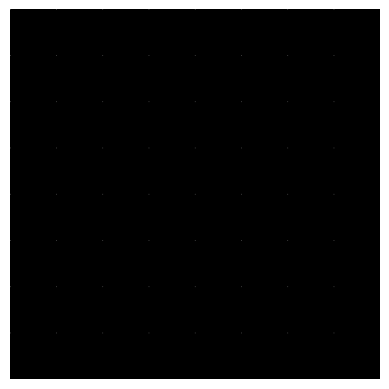

In [16]:
img = np.zeros((img_size, img_size, 1), dtype=np.uint8)

for i in range(0, img_size, cell_size):
    for j in range(0, img_size, cell_size):
        img[i, j, 0] = 255

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

En la anterior imagen se ha pintado el primer pixel de cada celda de blanco. Ahora para alternar entre los colores de la celda se busca el índice de la celda `(i // cell_size, j // cell_size)` y se observa que cuando se suman los índices de la celda queda en las diagonales una alternancia entre números pares e impapes. Cuando la suma de los índices sea impar se pinta de blanco o con el valor `255`.

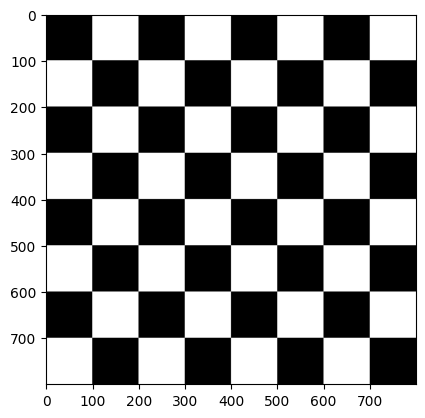

In [17]:
img = np.zeros((img_size, img_size, 1), dtype=np.uint8)

for i in range(0, img_size, cell_size):
    for j in range(0, img_size, cell_size):
        img[i:(i+cell_size), j:(j+cell_size), 0] = ((i + j) // cell_size % 2) * 255

plt.imshow(img, cmap='gray')
plt.show()

## 2. Crear una imagen estilo Mondrian con las funciones de dibujo de OpenCV

Se utilizan las funciones `cv2.rectangle` y `cv2.line` para pintar varias lineas que separa en regiones la imagen que luego se rellena con rectángulos de los colores declarados.

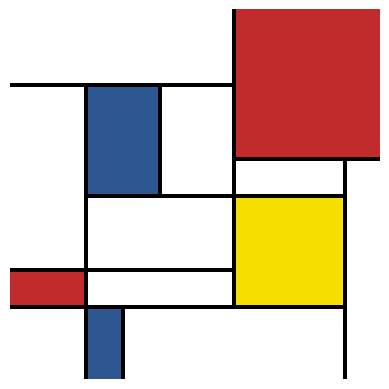

In [ ]:
img_size = 100

black = (0, 0, 0)
blue = (46, 87, 146)
red = (194, 43, 44)
yellow = (245, 222, 0)

img = np.full((img_size, img_size, 3), 255, dtype=np.uint8)

cv2.rectangle(img, (20, 20), (40, 50), blue, -1)
cv2.rectangle(img, (60, 0), (100, 40), red, -1)
cv2.rectangle(img, (60, 50), (90, 80), yellow, -1)
cv2.rectangle(img, (20, 80), (30, 100), blue, -1)
cv2.rectangle(img, (0, 70), (20, 80), red, -1)

cv2.line(img, (0, 20), (60, 20), black, 1)
cv2.line(img, (20, 50), (90, 50), black, 1)
cv2.line(img, (0, 80), (90, 80), black, 1)
cv2.line(img, (0, 70), (60, 70), black, 1)
cv2.line(img, (60, 40), (100, 40), black, 1)

cv2.line(img, (20, 20), (20, 100), black, 1)
cv2.line(img, (90, 40), (90, 100), black, 1)
cv2.line(img, (60, 0), (60, 80), black, 1)
cv2.line(img, (40, 20), (40, 50), black, 1)
cv2.line(img, (30, 80), (30, 100), black, 1)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

## 3. Modifica de forma libre los valores de un plano de la imagen

Se modifica el canal rojo para combinarse con la diferencia entre el canal verde y el canal rojo con mayor cuantización, es decir, que se comprimen los rangos de valores del color rojo a menos valores.

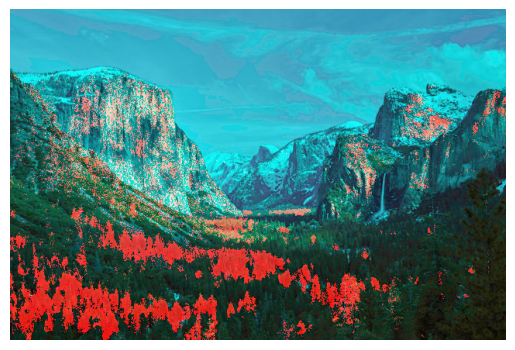

In [20]:
img = cv2.imread('./imagen-prueba.jpg')

#Separamos canales
b = img[:,:,0]
g = img[:,:,1]
r = g - (img[:,:,2] // 32) * 32

modified_img = np.dstack((r, g, b))
plt.imshow(modified_img)
plt.axis('off')
plt.show()

A continuación se muetra la implentación de la modificación del plano de la imagen con el vídeo obtenido de una webcam.

In [ ]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = g - (frame[:,:,2] // 32) * 32

        modified_frame = np.dstack((b, g, r))
        cv2.imshow('Vid', modified_frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

## 3. Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen ¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

Para pintar figuras en las posiciones del pixel más claro y oscuro se definen varias funciones de utilidad para, dada una imagen de un canal, devolver la primera posición con el valor más alto o más bajo.

In [23]:
from cv2 import Mat

def find_min(img: Mat) -> tuple[int, int, int]:
    h, w = img.shape[:2]
    result = (0, 0, 255)
    for j in range(h):
        for i in range(w):
            current_min_value = result[2]
            img_value = img[j, i]
            if img_value < current_min_value:
                result = (i, j, img_value)
    return result

def find_max(img: Mat) -> tuple[int, int, int]:
    h, w = img.shape[:2]
    result = (0, 0, 0)
    for j in range(h):
        for i in range(w):
            current_max_value = result[2]
            img_value = img[j, i]
            if img_value > current_max_value:
                result = (i, j, img_value)
    return result

Para pintar en la región 8x8 más clara o más oscura es necesario crear otra imagen que reduzca su tamaño. Cada pixel de la imagen resultante es la media de los valores de su región 8x8.

In [24]:
def reduce_img_mean_8x8(img: Mat) -> Mat:
    h, w = img.shape[:2]
    reduced_h, reduced_w = h // 8, w // 8
    result = np.zeros((reduced_h, reduced_w, 1), dtype=np.uint8)
    for j in range(reduced_h):
        for i in range(reduced_w):
            remapped_j, remapped_i = j * 8, i * 8
            result[j, i] = img[remapped_j:(remapped_j + 8), remapped_i:(remapped_i + 8)].mean()
    return result

In [25]:
# b g r
red = (80, 0, 255)
dark_red = (40, 0, 135)
green = (85, 232, 0)
dark_green = (57, 108, 0)

Para comprobar que las funciones son correctas se crea una imagen de pruebas para validarlas.

min: (100, 120, np.uint8(0))
max: (180, 120, np.uint8(255))


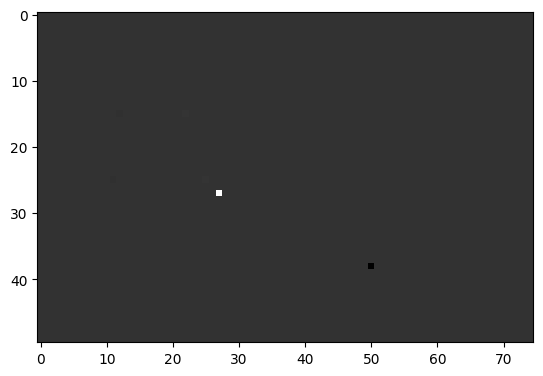

min: (50, 38, array([0], dtype=uint8))
max: (27, 27, array([255], dtype=uint8))
min: (400, 304)
max: (216, 216)


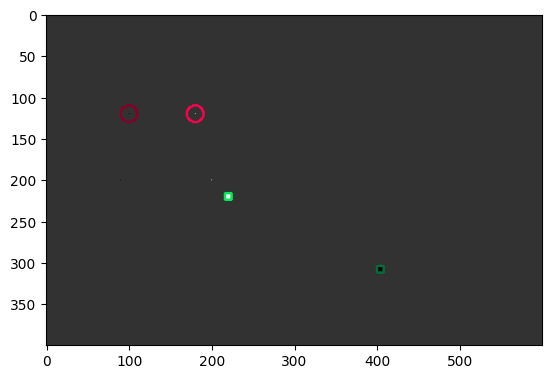

In [26]:
frame = np.full((400, 600, 3), 50, dtype=np.uint8)
frame[120, 100] = (0, 0, 0)
frame[200, 90] = (0, 0, 0)
frame[120, 180] = (255, 255, 255)
frame[200, 200] = (255, 255, 255)
frame[216:224, 216:224] = (255, 255, 255)
frame[304:312, 400:408] = (0, 0, 0)

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
min, max = find_min(gray), find_max(gray)
print(f"min: {min}")
print(f"max: {max}")
cv2.circle(frame, min[:2], 10, dark_red[::-1], 2)
cv2.circle(frame, max[:2], 10, red[::-1], 2)

gray_avg_8x8 = reduce_img_mean_8x8(gray)
plt.imshow(gray_avg_8x8, cmap='gray')
plt.show()
min, max = find_min(gray_avg_8x8), find_max(gray_avg_8x8)
print(f"min: {min}")
print(f"max: {max}")
min, max = (min[0] * 8, min[1] * 8), (max[0] * 8, max[1] * 8)
print(f"min: {min}")
print(f"max: {max}")
cv2.rectangle(frame, min[:2], (min[0]+8, min[1]+8), dark_green[::-1], 2)
cv2.rectangle(frame, max[:2], (max[0]+8, max[1]+8), green[::-1], 2)

plt.imshow(frame)
plt.show()

Se utilizan las funciones anteriormente declaradas para realizar la misma tarea en los fotogramas de la webcam.

In [53]:
vid = cv2.VideoCapture(0)

while(True):
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # creamos la imagen en grises para calcular los puntos más claros y oscuros
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # pintar los circulos en los pixeles más claros y oscuros
        min, max = find_min(gray), find_max(gray)
        cv2.circle(frame, min[:2], 3, dark_red, 2)
        cv2.circle(frame, max[:2], 3, red, 2)

        # pintar los rectángulos en los 8x8 más claros y oscuros
        gray_avg_8x8 = reduce_img_mean_8x8(gray)
        min, max = find_min(gray_avg_8x8), find_max(gray_avg_8x8)
        min, max = (min[0] * 8, min[1] * 8), (max[0] * 8, max[1] * 8)
        cv2.rectangle(frame, min, (min[0]+8, min[1]+8), dark_green, 2)
        cv2.rectangle(frame, max, (max[0]+8, max[1]+8), green, 2)

        cv2.imshow('Vid', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

## 4. Llevar a cabo una propuesta propia de pop art

Se importa una foto de un gato y se definen los parámetros a utilizar:

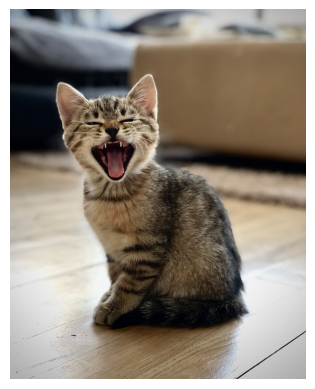

In [38]:
ncells: int = 10
tint: int = -120
circles_threshold: int = 190
q: int = 64
border_color = (200, 255, 100)

img = cv2.imread('./imagen-gato.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()
h, w, c = img.shape
cell_offset = ncells // 2

En las regiones claras se pintará circulos de diferente radio dependiendo de la intensidad, para esto es necesario tener los canales de la imagen combinados en una imagen de grises con su resolución reducida.

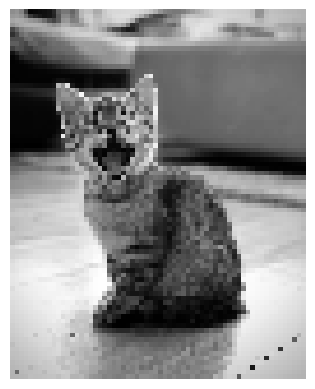

In [39]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
reduced_gray = cv2.resize(gray, (w // ncells, h // ncells), cv2.INTER_LINEAR)
reduced_h, reduced_w = reduced_gray.shape
plt.imshow(reduced_gray, cmap='gray')
plt.axis('off')
plt.show()

Se calculan los bordes de la imagen para añadirlos a la imagen final.

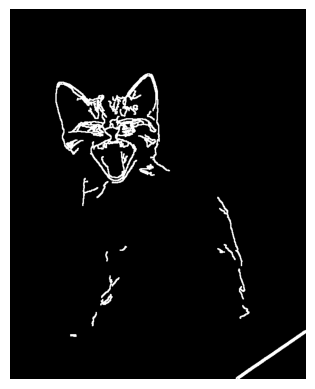

In [40]:
borders = cv2.GaussianBlur(gray, (5, 5), 0)
borders = cv2.Canny(borders, 70, 255)
borders = cv2.dilate(borders, np.ones((3, 3), np.uint8), iterations=1)
plt.imshow(borders, cmap='gray')
plt.axis('off')
plt.show()

Se aplican los efectos usando las imagenes generadas, se cuantizan los canales de la imagen y se añaden los bordes calculados.

In [41]:
for j in range(h):
    for i in range(w):
        # cuantizar imagen
        v = img[j, i]
        banding_v = (v[0] // q * q, v[1] // q * q, v[2] // q * q)

        # añadir bordes
        border_v = borders[j, i]
        if border_v > 20:
            img[j, i] = border_color
        else:
            img[j, i] = banding_v

A la imagen final se le añaden los circulos y se cambian los canales de la imagen final por cuadrantes.

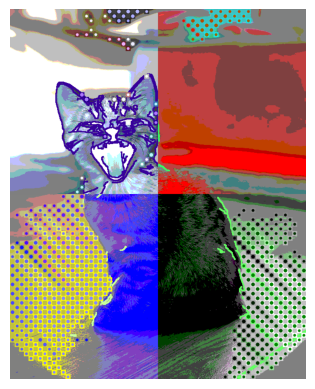

In [42]:
for j in range(reduced_h):
    flip = j % 2 == 0
    for i in range(reduced_w):
        flip = not flip
        # pintar las partes claras con círculos
        gray_v = reduced_gray[j, i]
        if flip and gray_v > circles_threshold:
            remapped_j, remapped_i = j * ncells, i * ncells
            v = img[remapped_j, remapped_i]
            color = (int(v[0]) + 10, int(v[1]) + 10, int(v[2]) + 10)
            color_2 = (int(v[0]) + tint, int(v[1]) + tint, 0)
            cv2.rectangle(img, (remapped_i, remapped_j), (remapped_i + ncells, remapped_j + ncells), color, -1)
            radius = int((float(gray_v) / 255) * cell_offset)
            cv2.circle(img, (remapped_i+ cell_offset, remapped_j + cell_offset), radius, color_2, -1)
        
# cambiar canales de colores en cada cuadrante
r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]

# cuadrante arriba izquierda
img[:h//2, :w//2] = 255 - img[:h//2, :w//2]

# cuadrante arriba derecha
img[:h//2, w//2:, 0] = 255 - r[:h//2, w//2:]

# cuadrante abajo derecha
img[h//2:, w//2:, 0] = b[h//2:, w//2:]
img[h//2:, w//2:, 1] = g[h//2:, w//2:]
img[h//2:, w//2:, 2] = r[h//2:, w//2:]

# cuadrante abajo izquierda
img[h//2:, :w//2, 2] = 255 - b[h//2:, :w//2]

plt.imshow(img)
plt.axis('off')
plt.show()